In [57]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("./Heart_2022_Cleaned.csv")
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadDiabetes_binary,LastChekupTime,BMI_cetegory,CovidPos_binary
0,Alabama,Female,4,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,0,0,0,0,0,0,0,0,0,0,Yes,0,0,0,0,0,0,0,1,0,"White only, Non-Hispanic",Age 80 or older,1.70,80.74,27.44,0,0,1,0,"Yes, received tetanus shot but not sure what type",0,No,1,1,Overweight,0
1,Alabama,Female,5,0.0,0.0,Within past year (anytime less than 12 months ...,0,6.0,0,0,0,0,0,1,0,0,0,0,No,0,0,0,0,0,0,0,0,0,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,No,0,1,Overweight,0
2,Alabama,Female,4,2.0,3.0,Within past year (anytime less than 12 months ...,1,5.0,0,0,0,0,0,1,0,0,0,0,No,0,0,0,0,0,0,0,0,0,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,Yes,0,1,Overweight,1
3,Alabama,Female,5,0.0,0.0,Within past year (anytime less than 12 months ...,1,7.0,0,0,0,0,1,0,0,0,0,1,No,0,0,0,0,0,0,2,0,1,"White only, Non-Hispanic",Age 65 to 69,1.65,63.50,23.30,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No,0,1,Normal,0
4,Alabama,Female,2,2.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,0,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,0,0,1,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,No,0,1,Normal,0


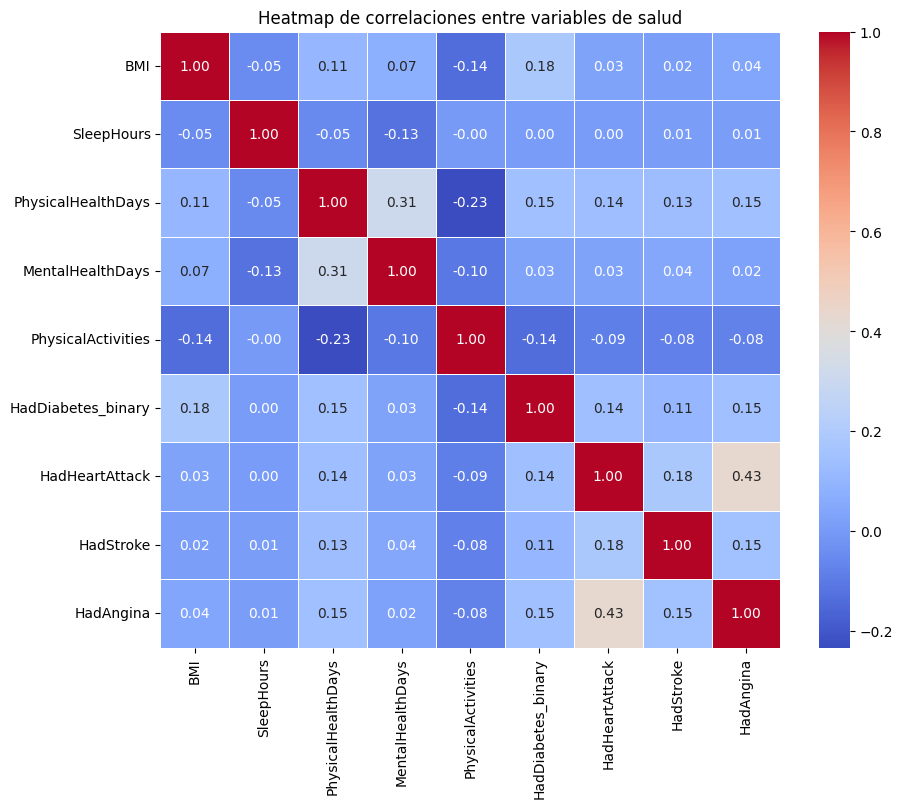

In [ ]:
########################################################################

cols = [
    "BMI",
    "SleepHours",
    "PhysicalHealthDays",
    "MentalHealthDays",
    "PhysicalActivities",
    "HadDiabetes_binary",
    "HadHeartAttack",
    "HadStroke",
    "HadAngina"
]

df_sel = df[cols].dropna()

# Matriz de correlación
corr = df_sel.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Heatmap de correlaciones entre variables de salud")
plt.show()

# Aquí podemos ver las variables que van más relacionadas y por ende las que más sentido tiene comparar
# Ignoramos los "1.00" porque son la misma variable obv
# Que podemos observar:
#
#       - Los problemas cardiovasculares en general van bastate relacionados 
#         con los ataques al corazón (en especial la angina de pecho)
#
#       - La diabetes por su lado también se relaciona con los ataques al corazón.
#
#       - Un IMC elevado (sobrepeso u obesidad) se ve más relacionado con mayores problemas de
#         salud física y sobretodo con la presencia de diabetes
#
#       - A su vez, los días de mala salud física y mental se ven bastante relacionados
#
# HadHeartAttack y HadAngina venian siendo relativamente iguales (patrones) hasta sleephours que nos dejó algo 
# confundidos en el analisis bivariante y terminamos de reforzar esto en el analisis multivariante.

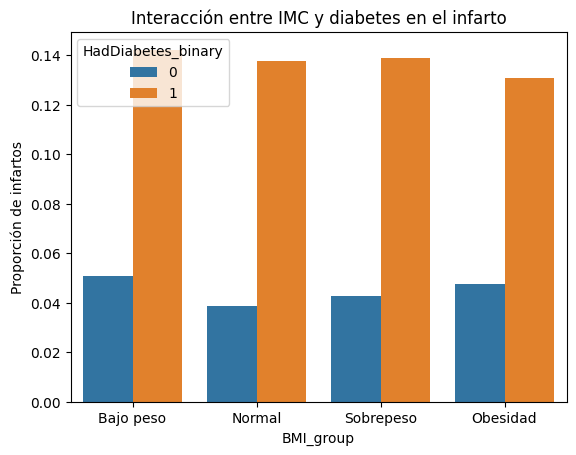

In [ ]:
# DESCARTE
# Crear bins de IMC
df["BMI_group"] = pd.cut(
    df["BMI"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Bajo peso", "Normal", "Sobrepeso", "Obesidad"]
)

patron0 = (
    df.groupby(["BMI_group", "HadDiabetes_binary"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

patron0

sns.barplot(
    data=patron0,
    x="BMI_group",
    y="HadHeartAttack",
    hue="HadDiabetes_binary"
)
plt.title("Interacción entre IMC y diabetes en el infarto")
plt.ylabel("Proporción de infartos")
plt.show()

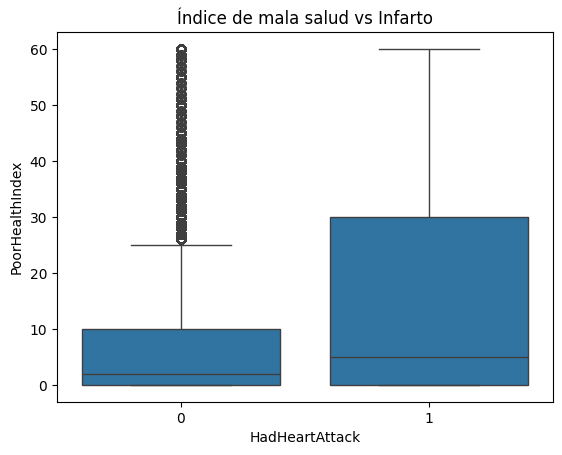

In [ ]:
# DESCARTE

df["PoorHealthIndex"] = (
    df["PhysicalHealthDays"] +
    df["MentalHealthDays"]
)

df[["PoorHealthIndex", "HadHeartAttack"]].corr()

sns.boxplot(
    data=df,
    x="HadHeartAttack",
    y="PoorHealthIndex"
)
plt.title("Índice de mala salud vs Infarto")
plt.show()

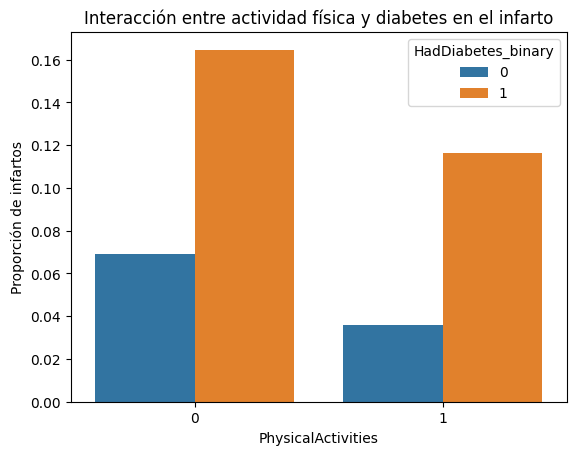

In [ ]:
# DESCARTE
patron1 = (
    df.groupby(["PhysicalActivities", "HadDiabetes_binary"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

patron1

sns.barplot(
    data=patron1,
    x="PhysicalActivities",
    y="HadHeartAttack",
    hue="HadDiabetes_binary"
)
plt.title("Interacción entre actividad física y diabetes en el infarto")
plt.ylabel("Proporción de infartos")
plt.show()

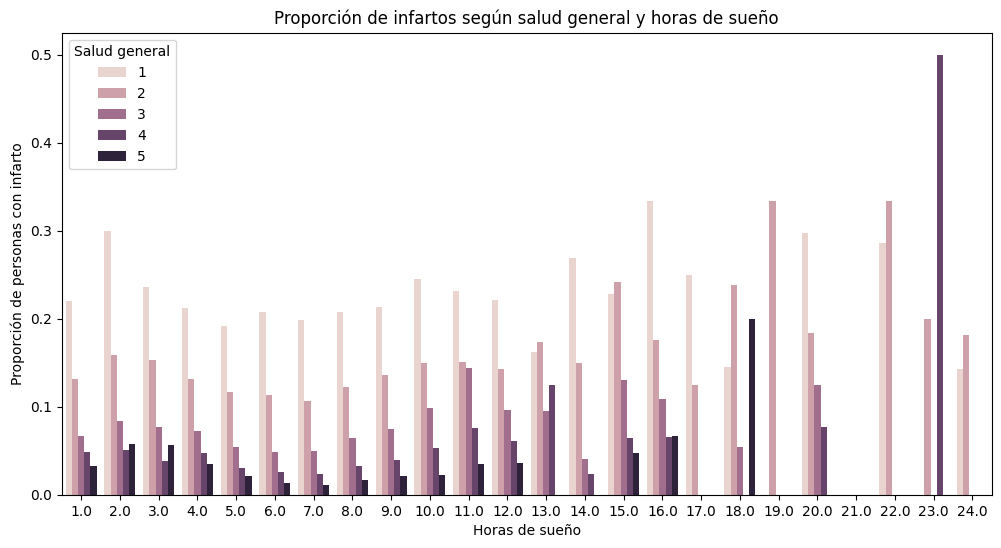

In [ ]:
########################################################################
patron2 = (
    df.groupby(["GeneralHealth", "SleepHours"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

patron2.head()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=patron2,
    x="SleepHours",
    y="HadHeartAttack",
    hue="GeneralHealth"
)

plt.title("Proporción de infartos según salud general y horas de sueño")
plt.ylabel("Proporción de personas con infarto")
plt.xlabel("Horas de sueño")
plt.legend(title="Salud general")
plt.show()

In [44]:
df["SleepHours"].value_counts()

SleepHours
7.0     138380
8.0     125442
6.0      95880
5.0      30122
9.0      21210
4.0      12433
10.0     10459
3.0       3260
12.0      3004
2.0       1549
1.0       1154
11.0       686
16.0       329
15.0       317
14.0       295
18.0       168
13.0       165
20.0       143
24.0        52
17.0        27
22.0        19
23.0        18
19.0        16
21.0         4
Name: count, dtype: int64

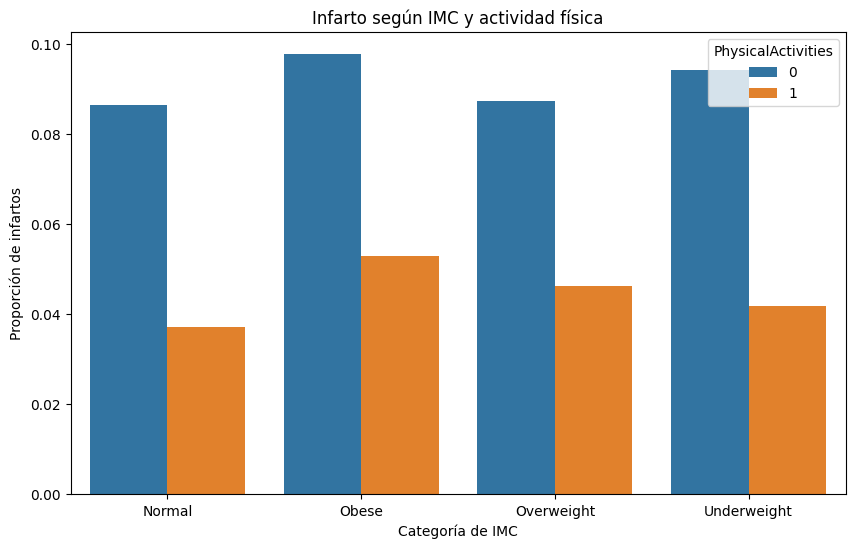

In [ ]:
# DESCARTE
patron3 = (
    df.groupby(["PhysicalActivities", "BMI_cetegory"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=patron3,
    x="BMI_cetegory",
    y="HadHeartAttack",
    hue="PhysicalActivities"
)

plt.title("Infarto según IMC y actividad física")
plt.ylabel("Proporción de infartos")
plt.xlabel("Categoría de IMC")
plt.show()


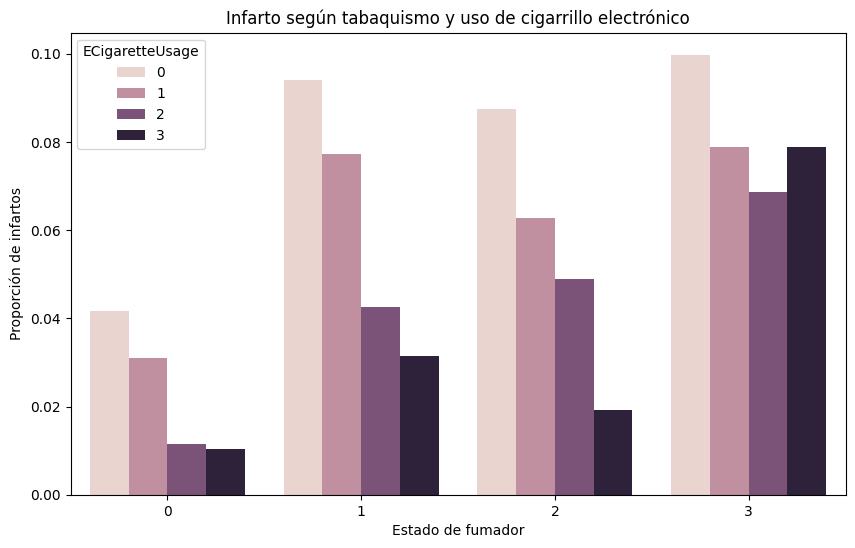

In [ ]:
########################################################################
patron4 = (
    df.groupby(["SmokerStatus", "ECigaretteUsage"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=patron4,
    x="SmokerStatus",
    y="HadHeartAttack",
    hue="ECigaretteUsage"
)

plt.title("Infarto según tabaquismo y uso de cigarrillo electrónico")
plt.ylabel("Proporción de infartos")
plt.xlabel("Estado de fumador")
plt.show()


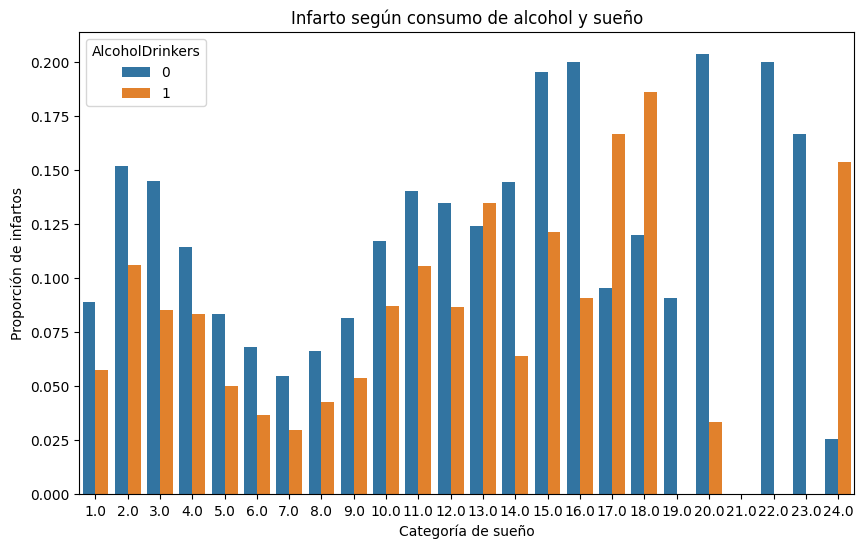

In [ ]:
# DESCARTE
patron5 = (
    df.groupby(["AlcoholDrinkers", "SleepHours"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=patron5,
    x="SleepHours",
    y="HadHeartAttack",
    hue="AlcoholDrinkers"
)

plt.title("Infarto según consumo de alcohol y sueño")
plt.ylabel("Proporción de infartos")
plt.xlabel("Categoría de sueño")
plt.show()

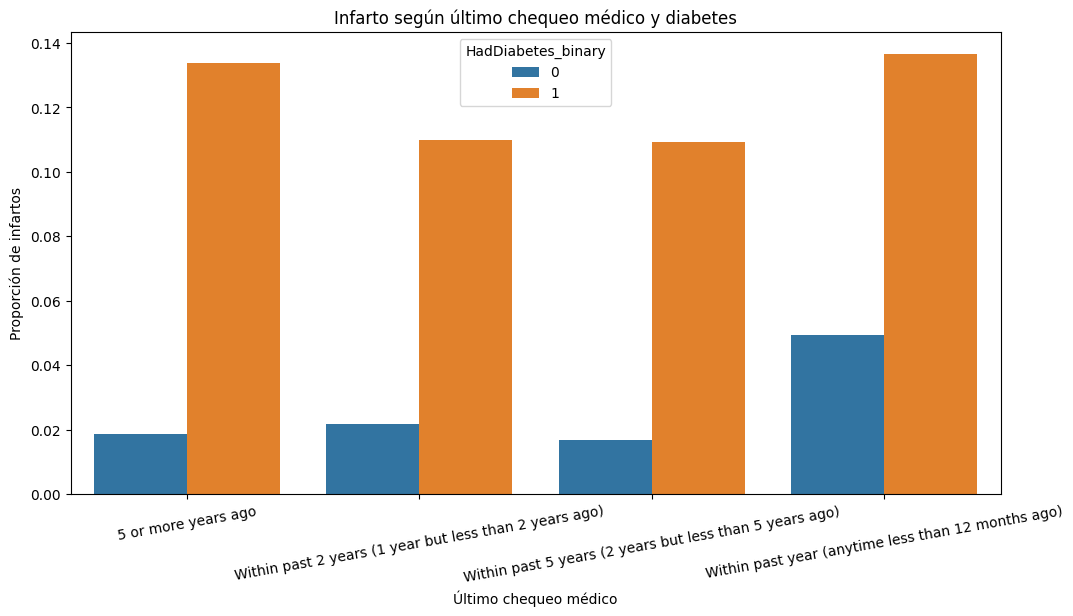

In [ ]:
# DESCARTE
patron6 = (
    df.groupby(["LastCheckupTime", "HadDiabetes_binary"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=patron6,
    x="LastCheckupTime",
    y="HadHeartAttack",
    hue="HadDiabetes_binary"
)

plt.title("Infarto según último chequeo médico y diabetes")
plt.ylabel("Proporción de infartos")
plt.xlabel("Último chequeo médico")
plt.xticks(rotation=10)
plt.show()


C:\Users\ALE\AppData\Local\Temp\ipykernel_15824\3410452400.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: ((x["HadHeartAttack"] == 1) |


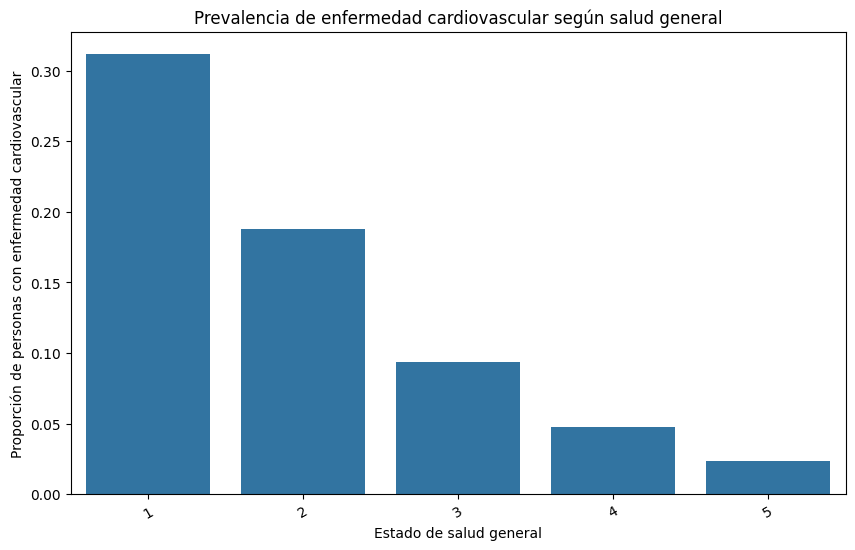

In [ ]:
# DESCARTE 
# HIPÓTESIS 1

cardio_by_health = (
    df.groupby("GeneralHealth")
      .apply(lambda x: ((x["HadHeartAttack"] == 1) | 
                        (x["HadAngina"] == 1)).mean())
      .reset_index(name="Cardio_Disease")
)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=cardio_by_health,
    x="GeneralHealth",
    y="Cardio_Disease"
)

plt.title("Prevalencia de enfermedad cardiovascular según salud general")
plt.xlabel("Estado de salud general")
plt.ylabel("Proporción de personas con enfermedad cardiovascular")
plt.xticks(rotation=30)
plt.show()

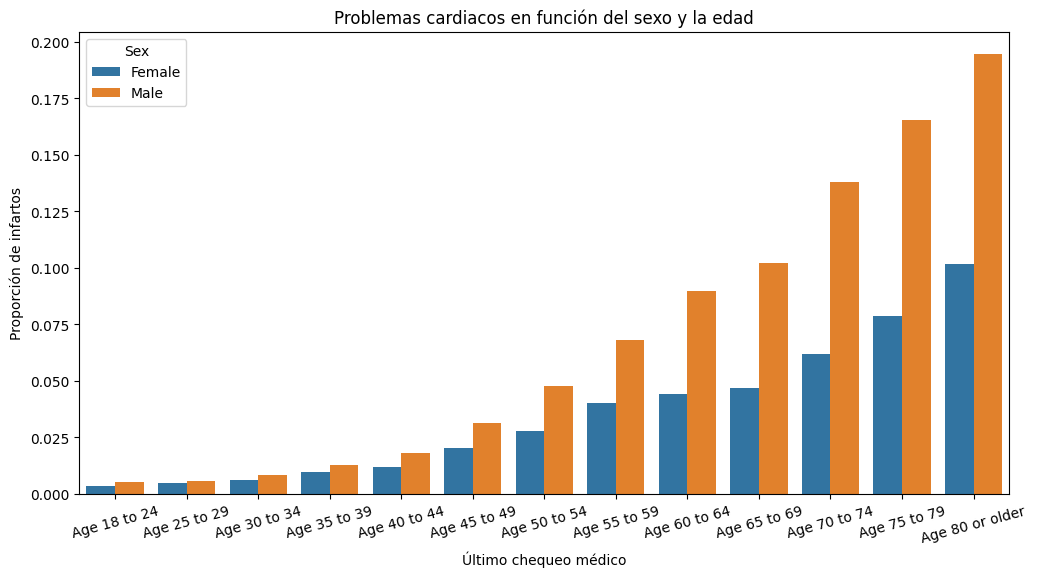

In [ ]:
########################################################################
# HIPÓTESIS 2

patron6 = (
    df.groupby(["Sex", "AgeCategory"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=patron6,
    x="AgeCategory",
    y="HadHeartAttack",
    hue="Sex"
)

plt.title("Problemas cardiacos en función del sexo y la edad")
plt.ylabel("Proporción de infartos")
plt.xlabel("Último chequeo médico")
plt.xticks(rotation=15)
plt.show()

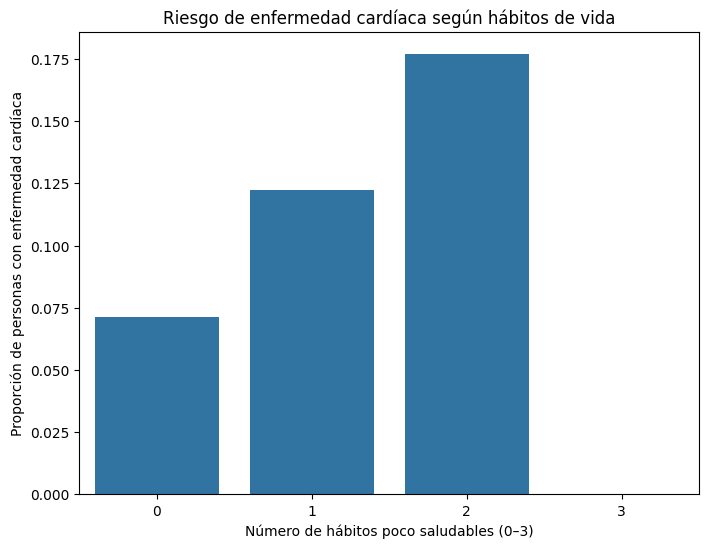

In [ ]:
# DESCARTE
# HIPÓTESIS 3

# Sedentarismo: no realiza actividad física
sedentary = df["PhysicalActivities"] == 0

# Tabaquismo: fumador actual
smoker = df["SmokerStatus"].isin(["CurrentSmoker", "EveryDaySmoker", "SomeDaySmoker"])

# Bajo número de horas de sueño
low_sleep = df["SleepHours"] < 6

unhealthy_habits_count = sedentary.astype(int) + smoker.astype(int) + low_sleep.astype(int)

cardio_by_habits = []

for n_habits in [0, 1, 2, 3]:
    mask = unhealthy_habits_count == n_habits
    
    if mask.sum() == 0:
        cardio_rate = 0
    else:
        cardio_rate = (
            ((df.loc[mask, "HadHeartAttack"] == 1) |
             (df.loc[mask, "HadAngina"] == 1))
            .mean()
        )
    
    cardio_by_habits.append({
        "UnhealthyHabits": n_habits,
        "Cardio_Disease": cardio_rate
    })

cardio_by_habits = pd.DataFrame(cardio_by_habits)



plt.figure(figsize=(8, 6))

sns.barplot(
    data=cardio_by_habits,
    x="UnhealthyHabits",
    y="Cardio_Disease",
    order=[0, 1, 2, 3]
)

plt.title("Riesgo de enfermedad cardíaca según hábitos de vida")
plt.xlabel("Número de hábitos poco saludables (0–3)")
plt.ylabel("Proporción de personas con enfermedad cardíaca")
plt.show()


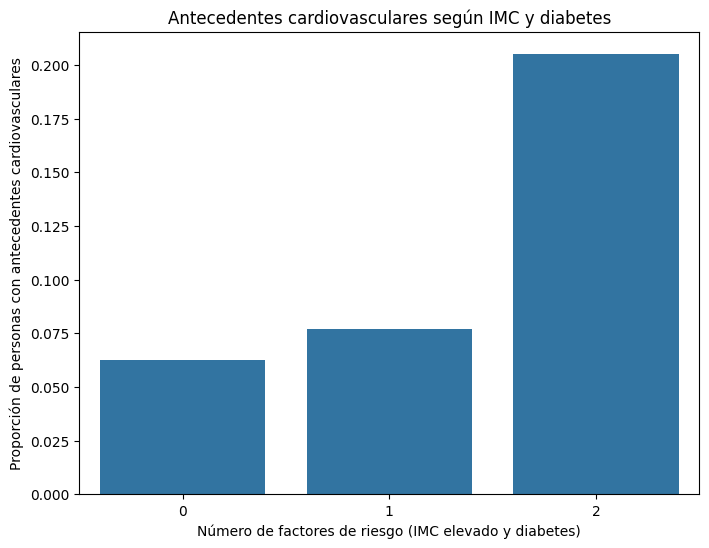

In [ ]:
# DESCARTE
# HIPÓTESIS 4

high_bmi = df["BMI_cetegory"].isin(["Overweight", "Obese"])

diabetes = df["HadDiabetes_binary"] == 1

risk_factors_count = high_bmi.astype(int) + diabetes.astype(int)

cardio_by_risk = []

for n_factors in [0, 1, 2]:
    mask = risk_factors_count == n_factors
    
    if mask.sum() == 0:
        cardio_rate = 0
    else:
        cardio_rate = (
            ((df.loc[mask, "HadHeartAttack"] == 1) |
             (df.loc[mask, "HadAngina"] == 1))
            .mean()
        )
    
    cardio_by_risk.append({
        "RiskFactors": n_factors,
        "Cardio_Disease": cardio_rate
    })

cardio_by_risk = pd.DataFrame(cardio_by_risk)


plt.figure(figsize=(8, 6))

sns.barplot(
    data=cardio_by_risk,
    x="RiskFactors",
    y="Cardio_Disease",
    order=[0, 1, 2]
)

plt.title("Antecedentes cardiovasculares según IMC y diabetes")
plt.xlabel("Número de factores de riesgo (IMC elevado y diabetes)")
plt.ylabel("Proporción de personas con antecedentes cardiovasculares")
plt.show()
